___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

## Summary

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# See descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
# Check duplicates
df.duplicated().sum().any()

False

In [7]:
# Check null values
df.isnull().sum().any()

False

In [8]:
# We discover that CustomerID is just an ID, but before deleting it,
# we want to make sure that it has n unique values since a replicate CustomerID indicates something is wrong 
df['CustomerID'].nunique()

200

In [9]:
# Drop it
df.drop(["CustomerID"], axis = 1, inplace=True)

In [10]:
# Count of each gender
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
# Define the mapping dictionary
mapping = {'Male': 0, 'Female': 1}

# Map the categorical column to 0s and 1s
df['Gender'] = df['Gender'].map(mapping)

# Print the mapped column
print(df['Gender'])

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64


<Figure size 3000x3000 with 0 Axes>

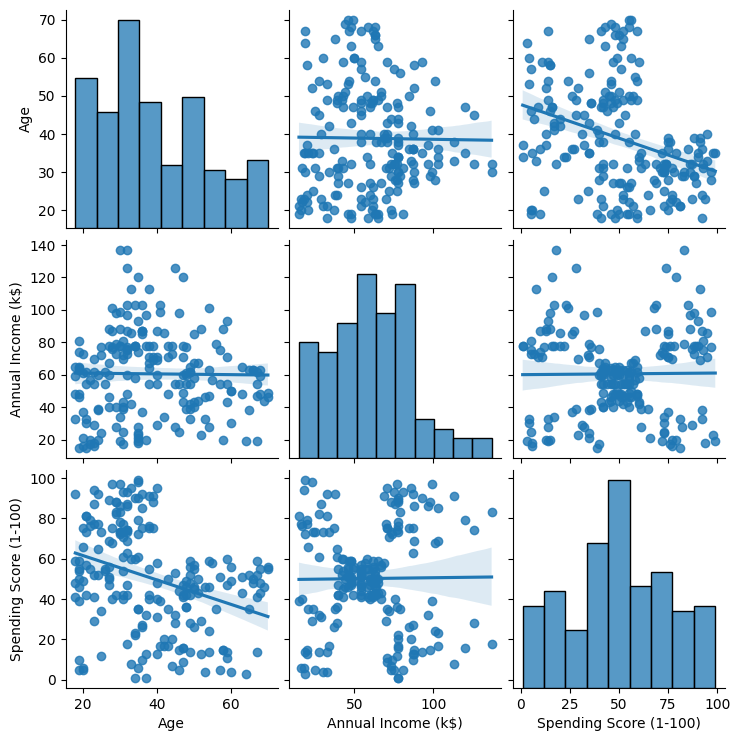

In [12]:
# Plot the pair plot
# To get an idea of the number of cluster
#To get an idea of the linear correlation between the features
plt.figure(figsize =(30,30))
sns.pairplot(df.drop("Gender",axis=1), kind="reg")

<Axes: >

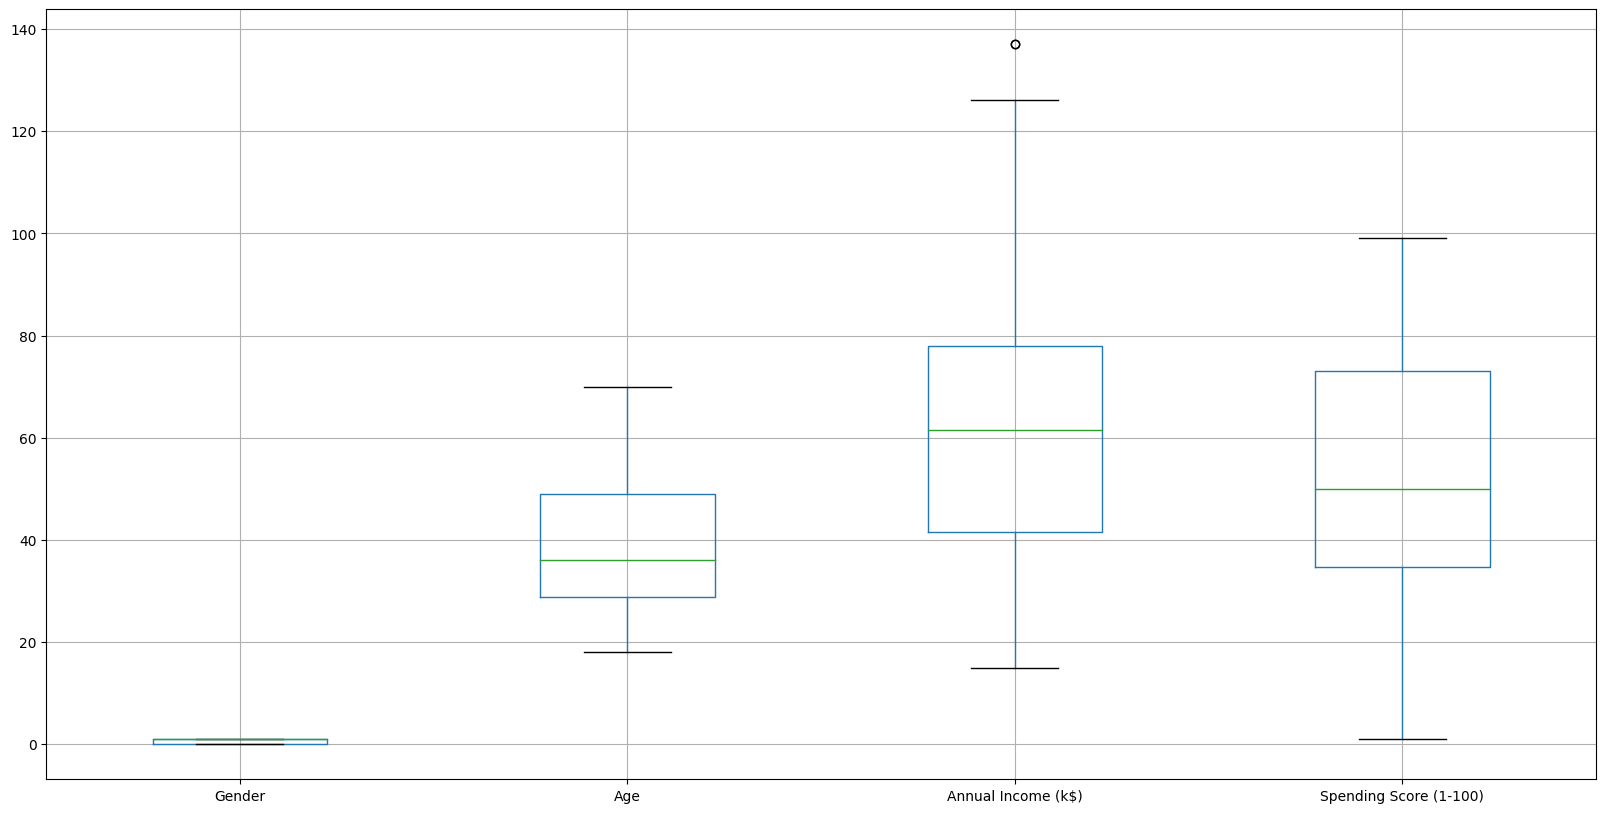

In [13]:
#Plot box plot to investigate outliers
#We discover that there is just one outlier so we did not take an action 

plt.figure(figsize =(20,10))
df.boxplot()

<Axes: >

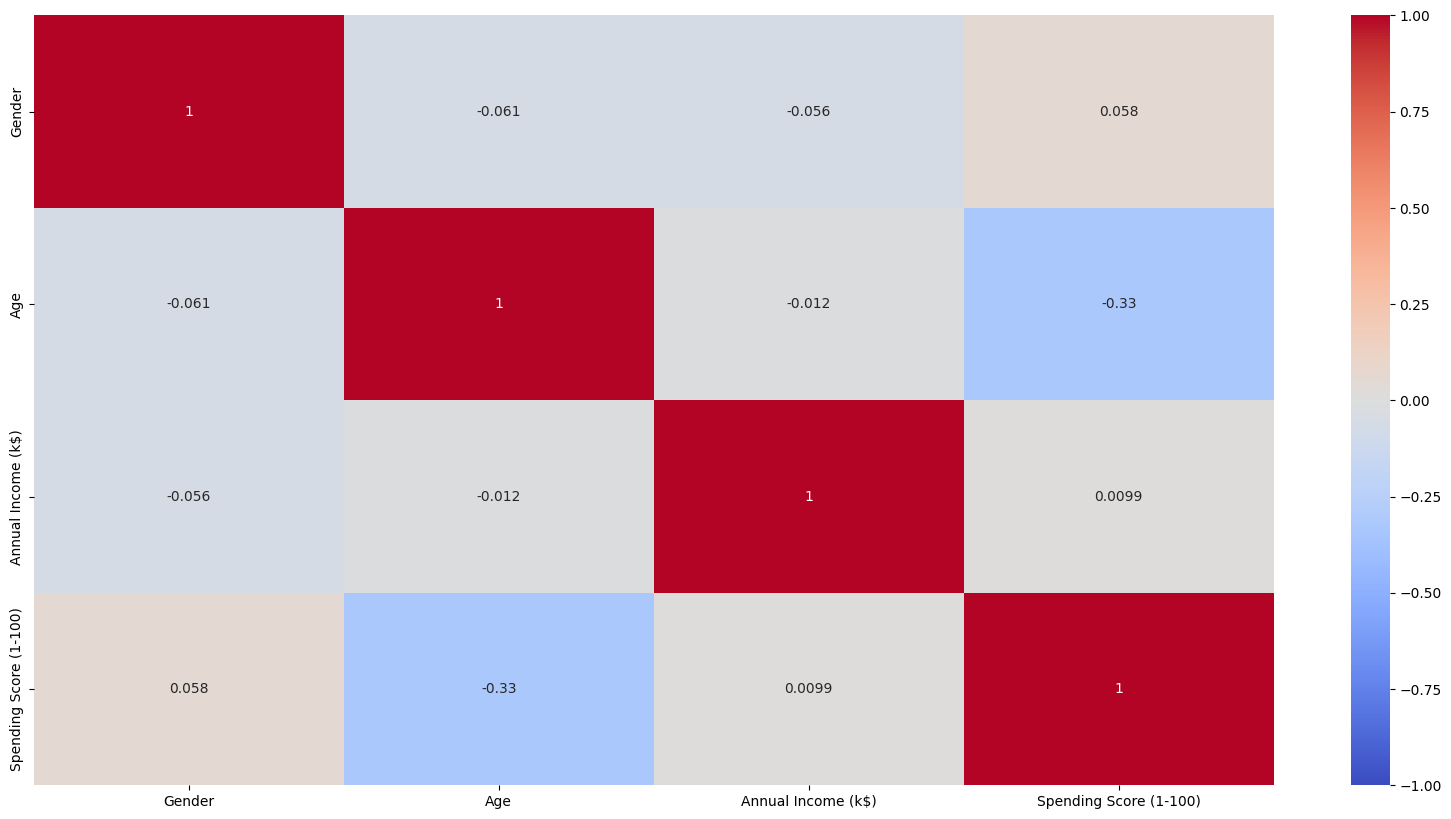

In [14]:
#Heat map to see Pearson’s correlation between the features 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

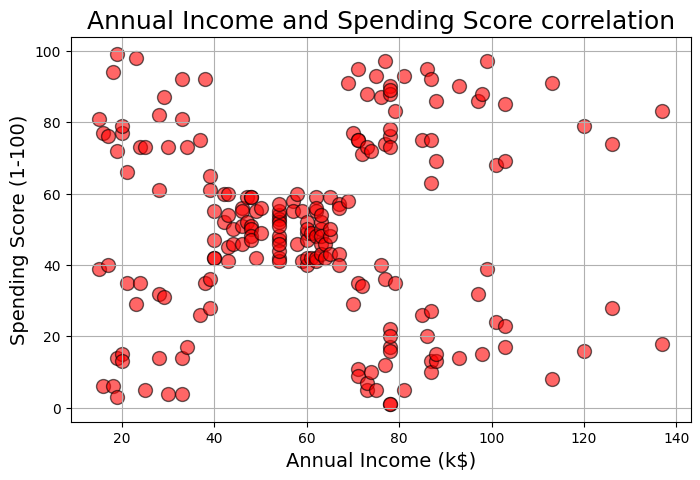

In [15]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

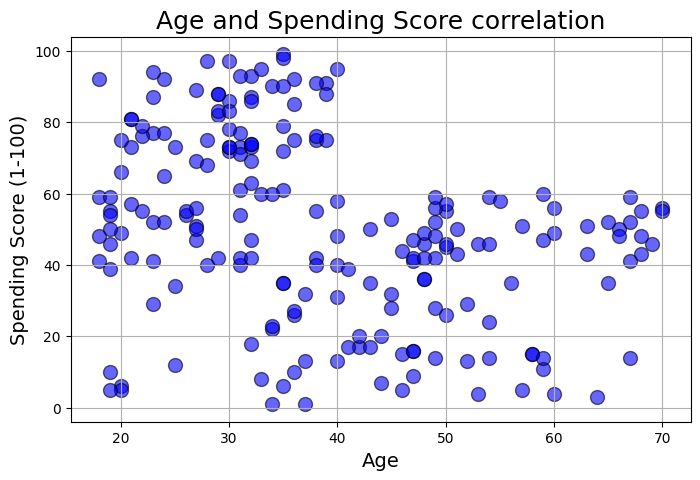

In [16]:
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

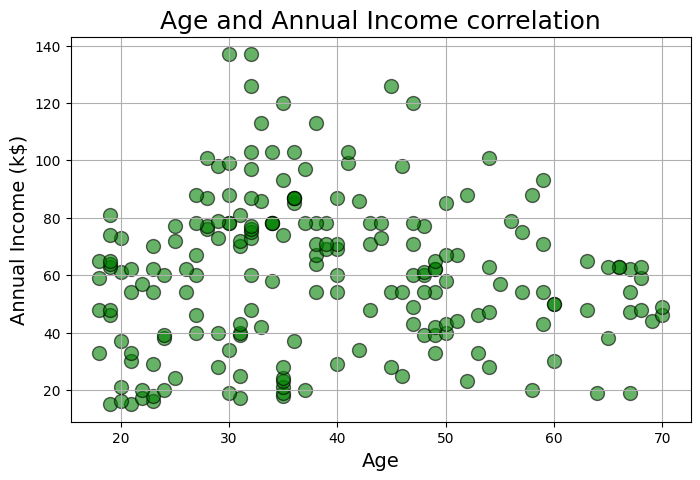

In [17]:
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

## Conclusion of EDA … 
- It seems there are no high correlations between the variables 
- Scaling seems unnecessary but better since clustering depend on distances
- Just based on the scatter plot: customers can be segmented into 2-5 clusters

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### K_Means Clustering

In [18]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [19]:
#Create a function of Hopkins test which can be used for tendency of clustering, where >0.5 is support that idea
#We use the whole dataset for the test since its small [n=200]

hopkins(df, 1)

0.6986203559292277

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
# X1 : Age & Spending Score

# X2: Age & Spending Score
X1 = df.iloc[:, [1,3]]
X_Age_SpendingScore = X1.copy()

X_Age_SpendingScore.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [21]:
from sklearn.preprocessing import StandardScaler
# Standardize the two features
scaler = StandardScaler()
X_Age_SpendingScore = scaler.fit_transform(X_Age_SpendingScore)
X_Age_SpendingScore_scaled = pd.DataFrame(X_Age_SpendingScore, columns = ['Age','Spending Score (1-100)'])

In [22]:
X_Age_SpendingScore_scaled

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


In [23]:
# Check using the 1st observation
(df["Age"][0] - np.mean(df["Age"])) / np.std(df["Age"])

-1.4245687900521393

#### *ii. Determine optimal number of clusters*

In [26]:
ssd = []

K = range(1,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X_Age_SpendingScore_scaled)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

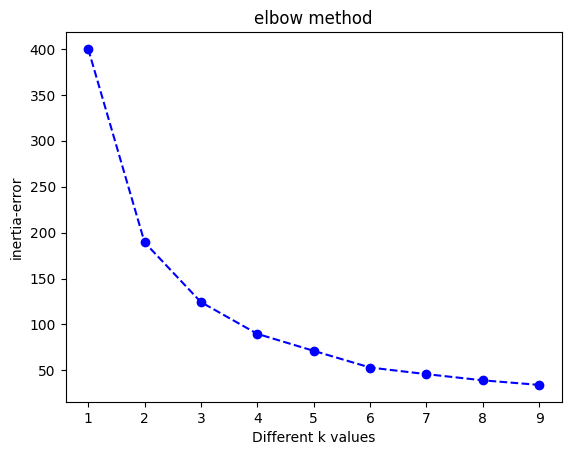

In [27]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [28]:
-pd.Series(ssd).diff()

0           NaN
1    210.612510
2     65.061204
3     34.561069
4     18.469651
5     18.167128
6      7.221334
7      6.721908
8      5.016355
dtype: float64

In [29]:
K = range(1, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_Age_SpendingScore_scaled)
    distances = kmeanModel.transform(X_Age_SpendingScore_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

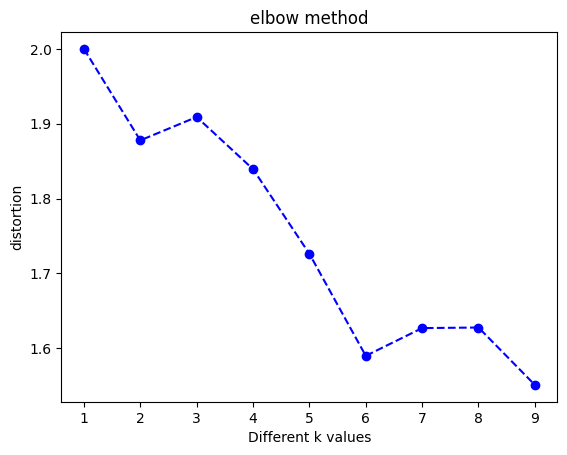

In [30]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

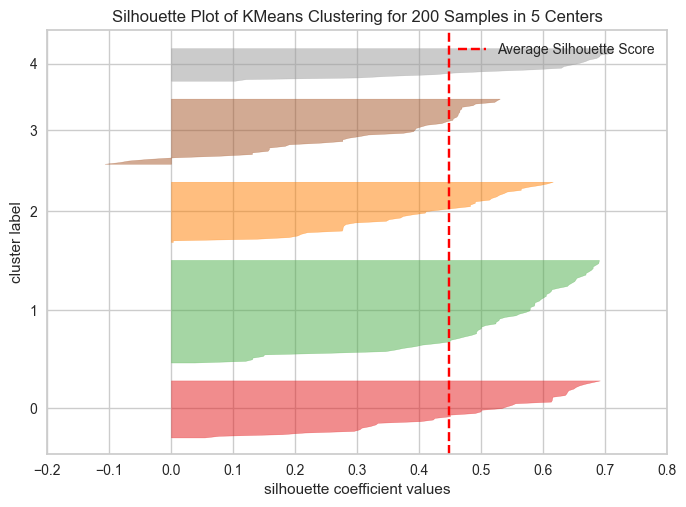

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

model_6 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_6)

visualizer.fit(X_Age_SpendingScore_scaled)    # Fit the data to the visualizer
visualizer.poof();


There are some -ve silhouette_scores in the cluster number 3 which means that there are point are closer to the mean of the nearest neighbor more than the mean of their own cluster, when we visualize the points, it will be clearer  

In [32]:
for i in range(6):
    label = (model_6.labels_== i)
    print(f"mean silhouette score for label {i:<7} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0       : 0.4788159409976718
mean silhouette score for label 1       : 0.5189980517852315
mean silhouette score for label 2       : 0.39009118401598214
mean silhouette score for label 3       : 0.30627708347487087
mean silhouette score for label 4       : 0.5559830072623717
mean silhouette score for label 5       : nan
mean silhouette score for all labels : 0.4475485887887892


To determine the number of clusters: Elbow method of inertia & elbow method of distortion & Silhouette’s test were performed By using the tree methods into account, 5 clusters seems the better number of clusters

#### *iii. Apply K Means*

In [33]:
K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit_predict(X1)

array([2, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 2,
       1, 2, 4, 2, 2, 2, 4, 2, 2, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       1, 4, 2, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 1, 4, 2, 4, 1, 2, 1, 4, 2,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 1, 2, 2, 2, 4, 4, 1, 4, 2, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 2, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       3, 0])

#### *iv. Visualizing and Labeling All the Clusters*

In [34]:
clusters = K_means_model.labels_

In [35]:
X_Age_SpendingScore_scaled.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


In [36]:
X1["predicted_clusters"] = clusters
X1.head()

,Age,Spending Score (1-100),predicted_clusters
0,19,39,2
1,21,81,0
2,20,6,3
3,23,77,0
4,31,40,2


In [37]:
X1["predicted_clusters"]

0      2
1      0
2      3
3      0
4      2
      ..
195    0
196    1
197    0
198    3
199    0
Name: predicted_clusters, Length: 200, dtype: int32

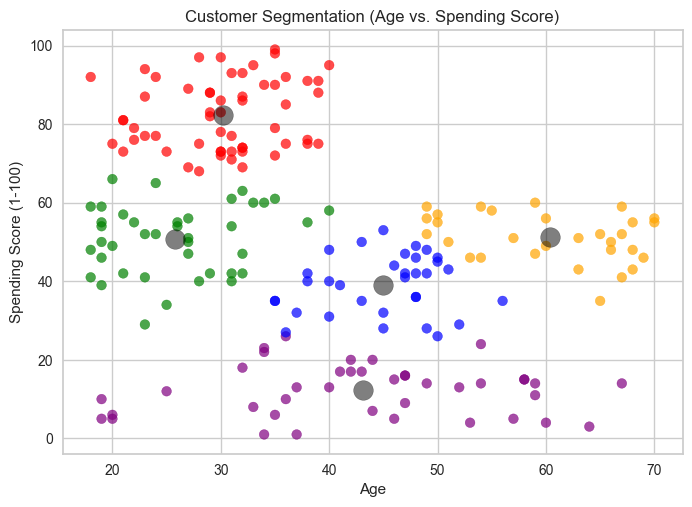

In [38]:
import matplotlib.pyplot as plt

# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red',    1: 'blue',     2: 'green',    3: 'purple',    4: 'orange',    5: 'gray'}
centers = K_means_model.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X1['Age'],
            X1['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in X1.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

you see that purple cluster is wide, which lead to some -ve silhouette_scores

In [39]:
labels={0:'young age high spenders', 1:'mid age mid spenders',
        2:'young age mid spenders', 3:'low spenders', 4:'old age mid spenders'}

X1['Meaningful Labels']=X1['predicted_clusters'].map(labels)
X1.head()

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels
0,19,39,2,young age mid spenders
1,21,81,0,young age high spenders
2,20,6,3,low spenders
3,23,77,0,young age high spenders
4,31,40,2,young age mid spenders


### Clustering based on Annual Income and Spending Score

In [40]:
# X2: Age & Spending Score
X2 = df.iloc[:, [2,3]]
X_AnnualIncome_SpendingScore = X2.copy()
X_AnnualIncome_SpendingScore.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_AnnualIncome_SpendingScore_scaled=scaler.fit_transform(X_AnnualIncome_SpendingScore)
X_AnnualIncome_SpendingScore_scaled = pd.DataFrame(X_AnnualIncome_SpendingScore_scaled, columns = ['Annual Income (k$)','Spending Score (1-100)'])

In [42]:
X_AnnualIncome_SpendingScore_scaled

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [43]:
# Check using the 1st observation
(df["Annual Income (k$)"][0] - np.mean(df["Annual Income (k$)"])) / np.std(df["Annual Income (k$)"])

-1.7389991930659485

In [44]:
#Hopkins test which can be used for tendency of clustering, where >0.5 is support that idea
#We use the whole dataset for the test since its small [n=200]

hopkins(X_AnnualIncome_SpendingScore_scaled, 1)

0.717625229286599

#### *ii. Determine optimal number of clusters*

In [45]:
ssd = []

K2 = range(1,10)

for k in K2:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X_AnnualIncome_SpendingScore_scaled)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

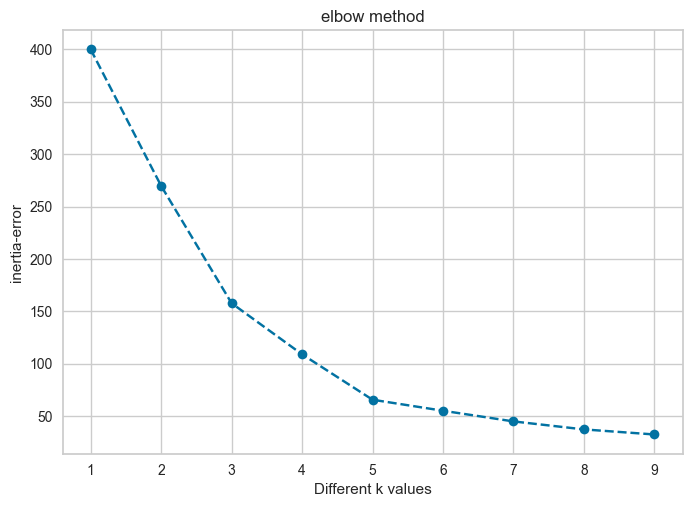

In [46]:
plt.plot(K2, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [47]:
-pd.Series(ssd).diff()

0           NaN
1    130.308988
2    111.987004
3     48.782692
4     43.352908
5     10.511060
6     10.192593
7      7.636568
8      4.835920
dtype: float64

In [48]:
K2 = range(1, 10)
distortion = []
for k in K2:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_AnnualIncome_SpendingScore_scaled)
    distances = kmeanModel.transform(X_AnnualIncome_SpendingScore_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

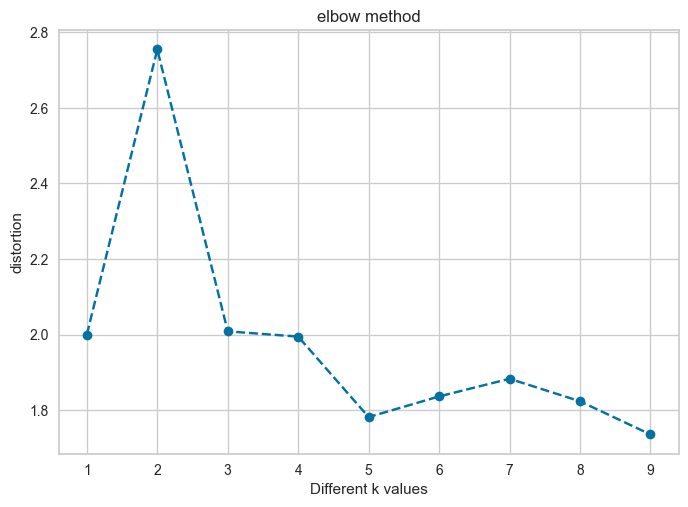

In [49]:
plt.plot(K2, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

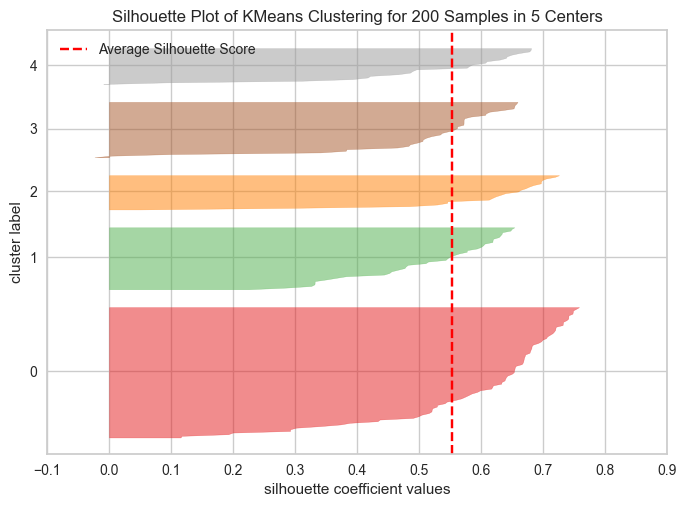

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer

model_5 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_5)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();


In [51]:
for i in range(5):
    label = (model_5.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5091706489322517
mean silhouette score for label 2      : 0.5990128687006722
mean silhouette score for label 3      : 0.5039873487056818
mean silhouette score for label 4      : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


To determine the number of clusters: Elbow method of inertia & elbow method of distortion & Silhouette’s test were performed By using the tree methods into account, 5 clusters seems the better number of clusters
<br>
The decision of 5 clusters is easier based on these two features than on the previous pair 

#### *iii. Apply K Means*

In [52]:
K_means_model_2 = KMeans(n_clusters=5,
                       random_state=42)
K_means_model_2.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [53]:
clusters_2 = K_means_model_2.labels_

In [54]:
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [55]:
X2["predicted_clusters"] = clusters_2
X2.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


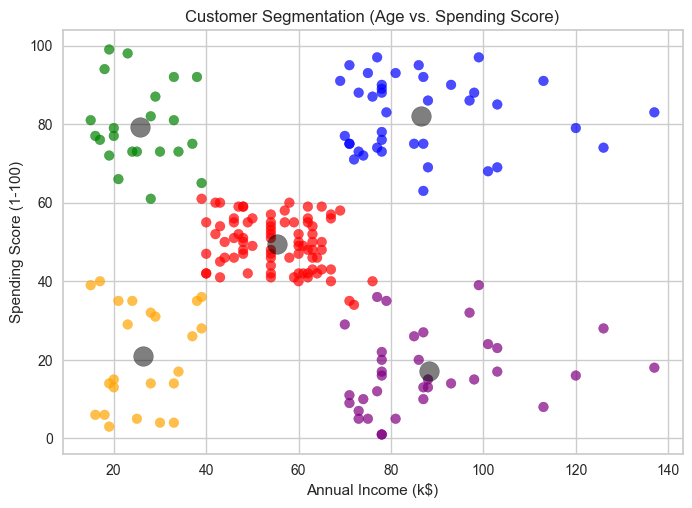

In [56]:
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red',     1: 'blue',      2: 'green',    3: 'purple',    4: 'orange'}
centers = K_means_model_2.cluster_centers_
# Assuming X2.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X2['Annual Income (k$)'],
            X2['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in X2.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [57]:
labels={0:'med income med spenders', 1:'high income high spenders', 
        2:'low income high spenders', 3:'high income low spenders', 4:'low income low spenders'}

X2['Meaningful Labels']=X2['predicted_clusters'].map(labels)
X2.head()



,Annual Income (k$),Spending Score (1-100),predicted_clusters,Meaningful Labels
0,15,39,4,low income low spenders
1,15,81,2,low income high spenders
2,16,6,4,low income low spenders
3,16,77,2,low income high spenders
4,17,40,4,low income low spenders


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering based on Age and Spending Score- x1

In [59]:
# X1 : Age & Spending Score
X1_HC = df.iloc[:, [1,3]]
X_Age_SpendingScore = X1_HC.copy()


X2_HC = df.iloc[:, [2,3]]
X_AnnualIncome_SpendingScore = X2_HC.copy()


In [60]:
X_Age_SpendingScore_scaled

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


## Since we got a value more than 0.5 we can continue with Clustering

In [61]:
# The following linkage methods are used to compute the distance  between two clusters in different ways

hc_ward = linkage(y=X_Age_SpendingScore_scaled, method="ward") # Default  --> minimize the varience of the clusters being merged
hc_complete = linkage(X_Age_SpendingScore_scaled, "complete")  #max
hc_average = linkage(X_Age_SpendingScore_scaled, "average")  # Mean
hc_single = linkage(X_Age_SpendingScore_scaled, "single")  # min

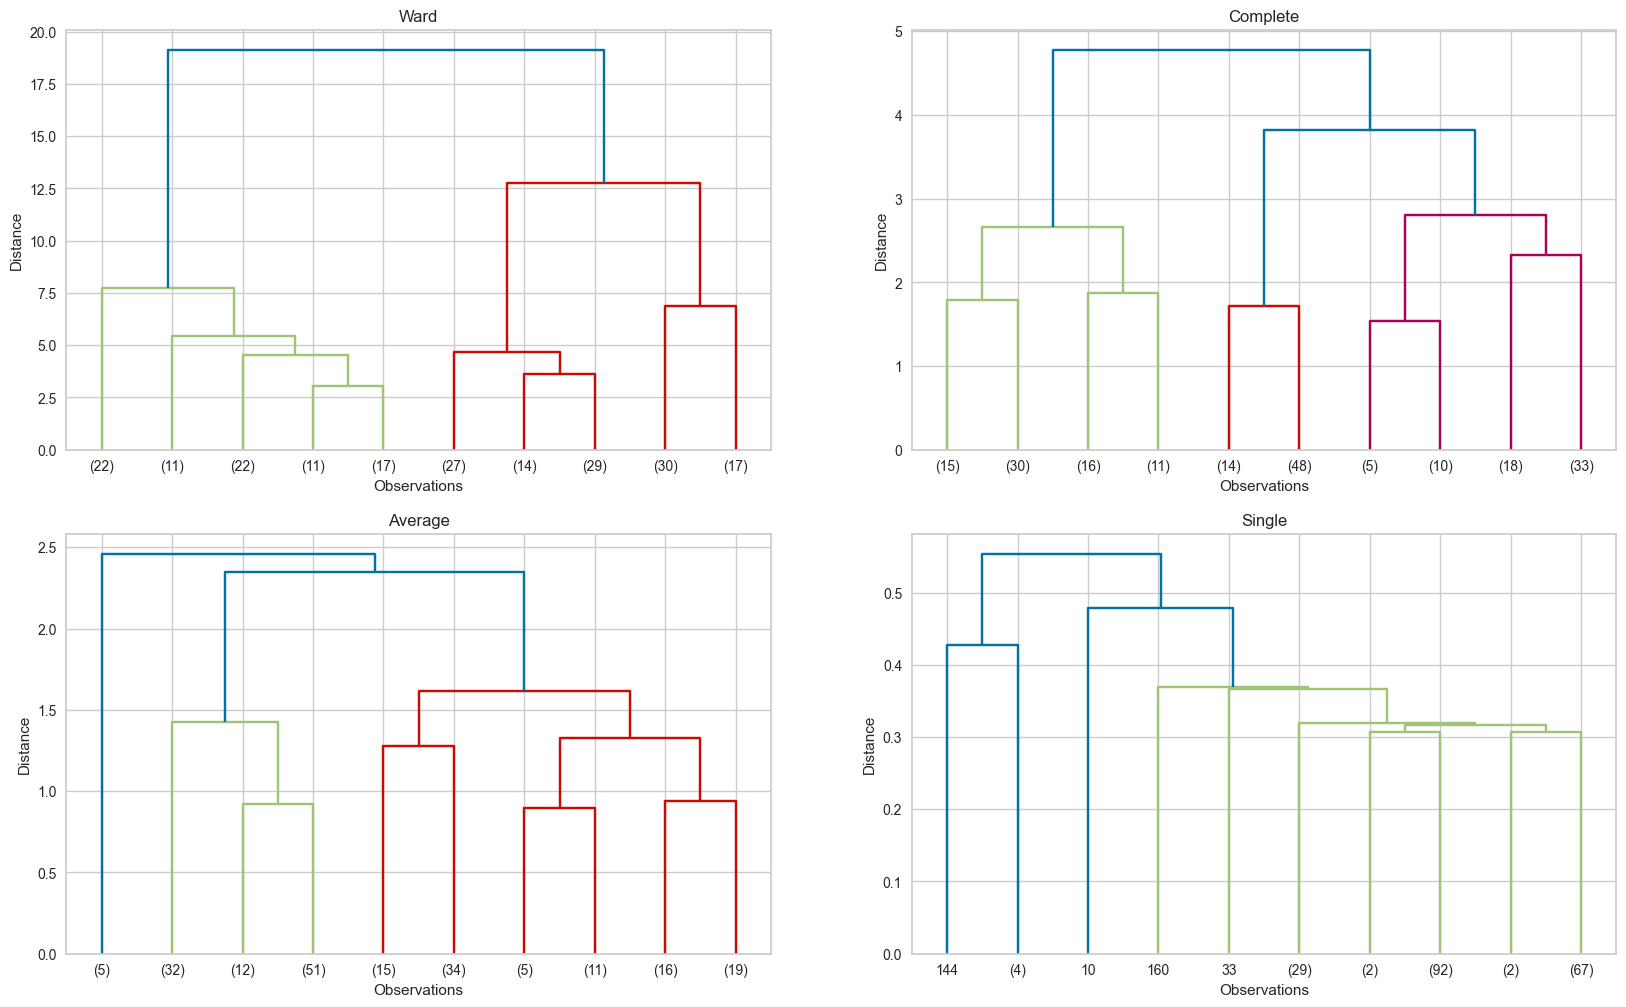

In [62]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);



We have decided that we will use 3 clusters using ward method. since it has even the maxmimize interclass distances 

## Clustering based on Annual Income and Spending Score- x2

## Since we got a value more than 0.5 we can continue with Clustering

In [63]:
hc_ward2 = linkage(y=X_AnnualIncome_SpendingScore_scaled, method="ward")
hc_complete2 = linkage(X_AnnualIncome_SpendingScore_scaled, "complete")
hc_average2 = linkage(X_AnnualIncome_SpendingScore_scaled, "average")
hc_single2 = linkage(X_AnnualIncome_SpendingScore_scaled, "single")

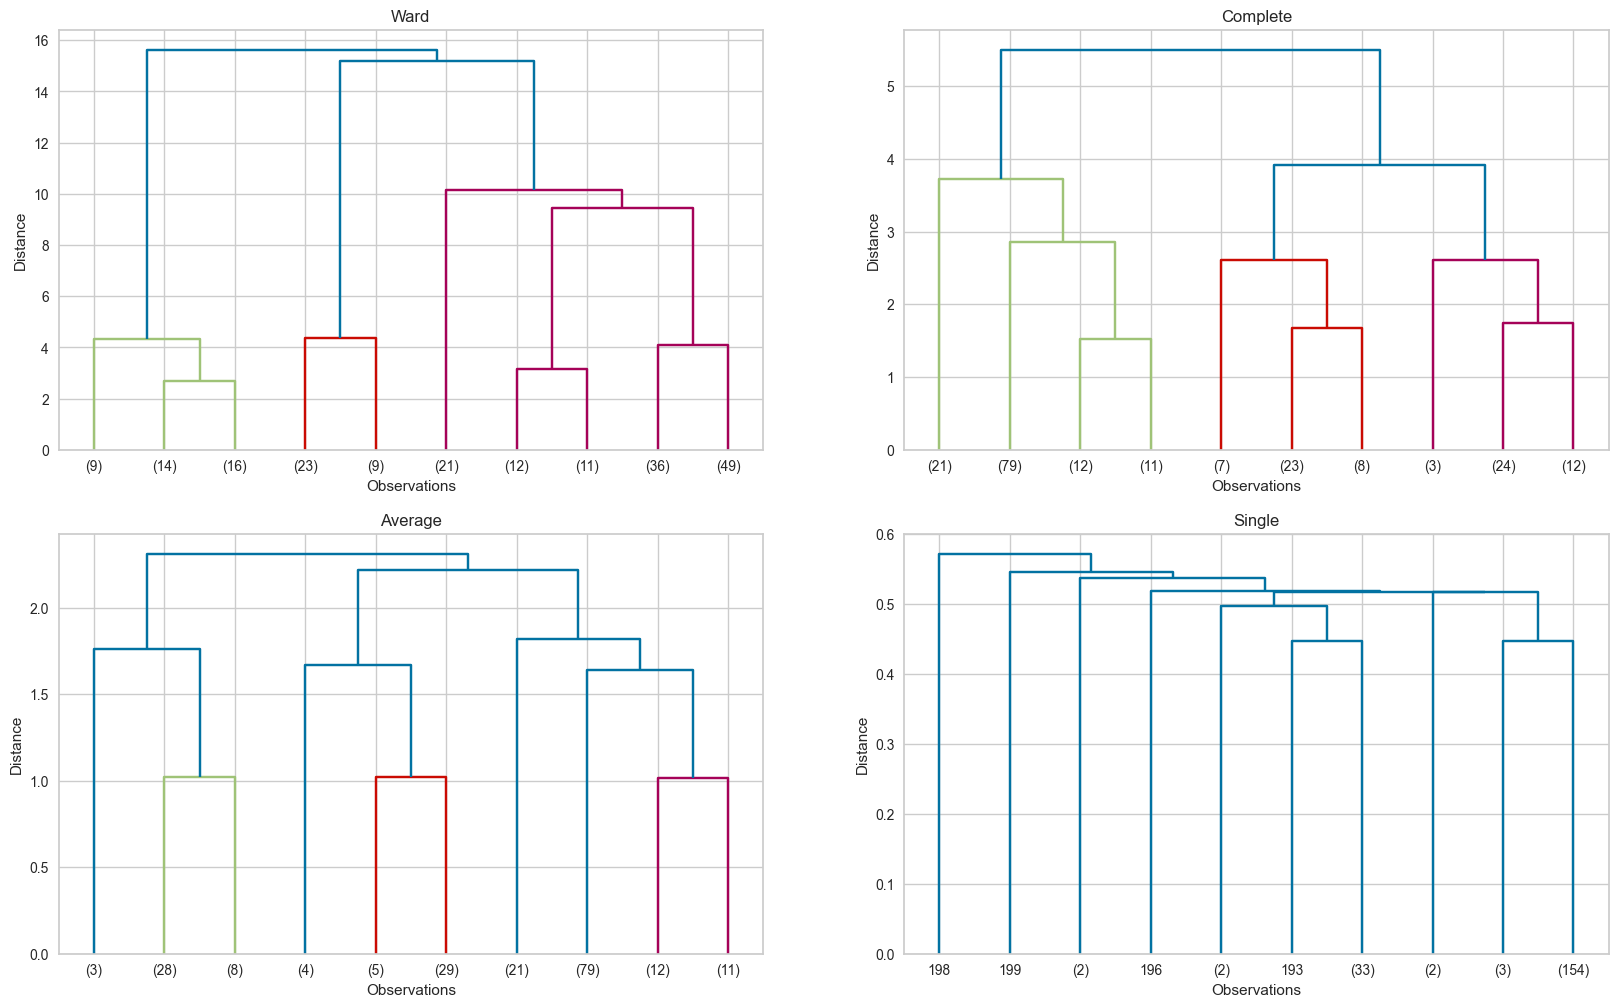

In [64]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single2, leaf_font_size = 10, truncate_mode='lastp', p=10);

 We have decided also that we will use 3 clusters using ward method. 
<br>
NOTE: the y-axis is not uniformed along the methods 

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
model =  AgglomerativeClustering(n_clusters=3,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x1 = model.fit_predict(X1_HC)

In [67]:
model.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

In [68]:
clusters = model.fit_predict(X1_HC)
X1_HC["clusters"] = clusters
X1_HC

,Age,Spending Score (1-100),clusters
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,2


#### Annual Income and Spending Score- x2

In [69]:
X2_model2 = AgglomerativeClustering(n_clusters=3,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x2 = X2_model2.fit_predict(X2_HC)

In [70]:
X2_model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [71]:
X2.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'predicted_clusters',
       'Meaningful Labels'],
      dtype='object')

In [72]:
clusters = X2_model2.labels_
X2_HC["clusters"] = clusters
X2_HC

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

Text(0.5, 1.0, 'Age vs Spending score')

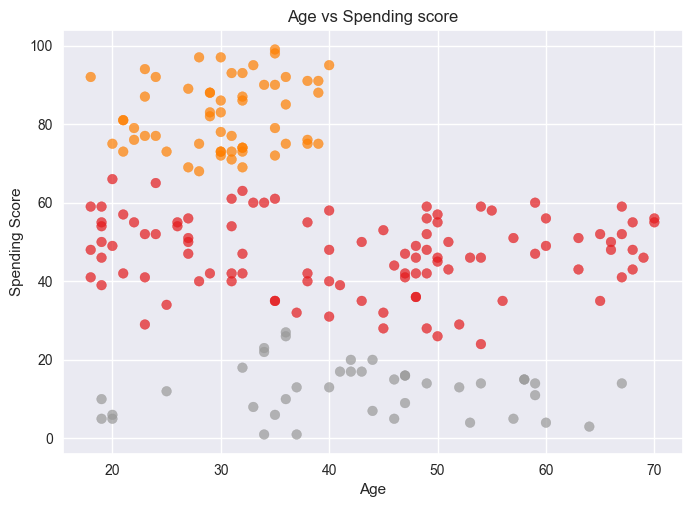

In [73]:
sns.set_style("darkgrid")

plt.scatter(X1_HC["Age"],
            X1_HC["Spending Score (1-100)"],
            c=model.labels_,
            cmap="Set1",
            alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending score')


**Interpretation based on Age and Spending Score- x1**
<br>
It seems that old people do not spend high

#### Annual Income and Spending Score- x2

Text(0.5, 1.0, 'Annual Income vs Spending score')

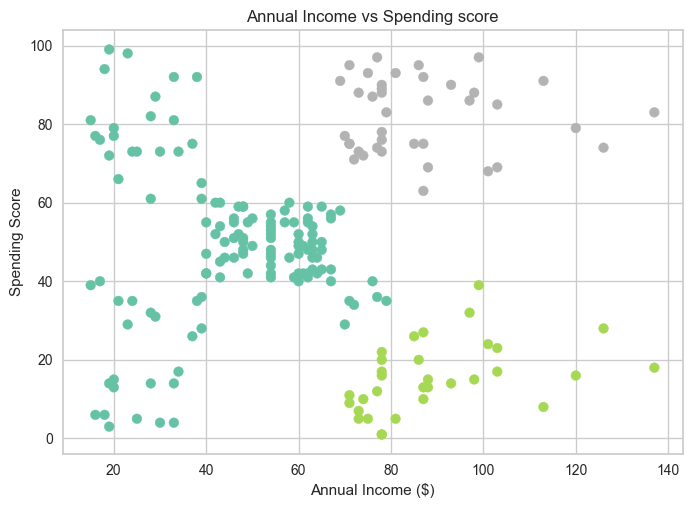

In [74]:
sns.set_style("whitegrid")
plt.scatter(data=X2_HC, x="Annual Income (k$)", y="Spending Score (1-100)", c='clusters', cmap='Set2')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending score')

**Interpretation based on Annual Income and Spending Score- x2**

It seems that who has mid income spend mid as well

## Conclusion
This is based on  clusters since personally 5 clusters same more reasonable than 3 on this dataset

<Axes: xlabel='predicted_clusters', ylabel='Annual Income (k$)'>

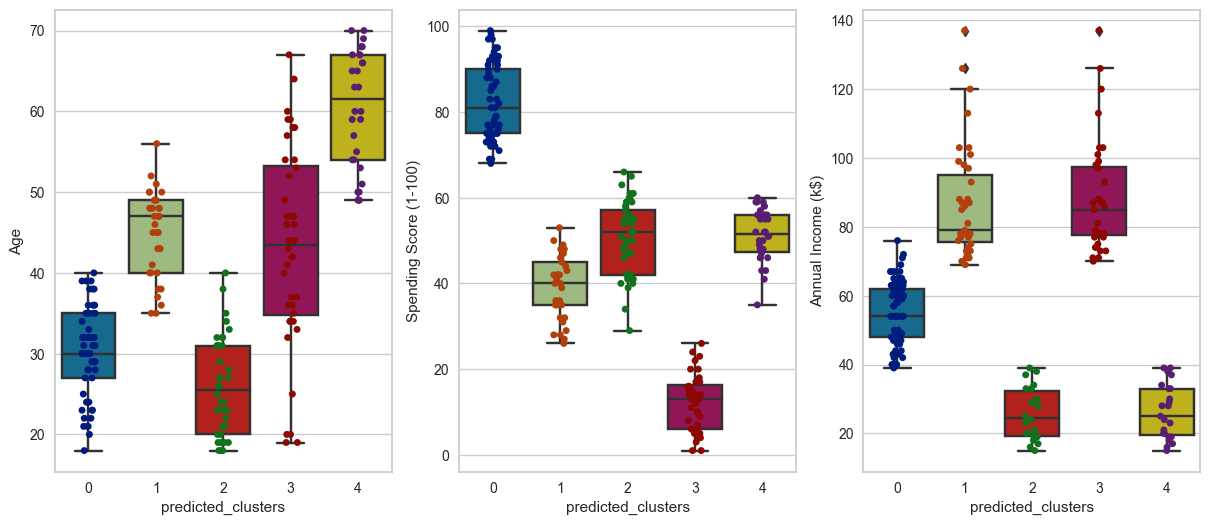

In [75]:
# I think I can separate clusters better with petal_length
# and petal_width features (according to lineplot)
# let's observe this with boxplot:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "predicted_clusters", data = X1)
sns.stripplot(y = "Age", x = "predicted_clusters", data = X1, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "Spending Score (1-100)", x = "predicted_clusters", data = X1)
sns.stripplot(y = "Spending Score (1-100)", x = "predicted_clusters", data = X1, palette="dark")

plt.subplot(143)
sns.boxplot(y = "Annual Income (k$)", x = "predicted_clusters", data = X2)
sns.stripplot(y = "Annual Income (k$)", x = "predicted_clusters", data = X2, palette="dark")





**cluster 0** : The average age is around 30, The annual income is not high but the spending score is high   
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    

**cluster 1** : The average age is around 45, The annual income is relatively high but the spending score is not high  
This group is our 2nd target audience and specific strategies should be developed to drive this group to spend.


**cluster 2**: The average age is around 25, the annual_income is low but the spending_scores is not bad. 
we need just to preserve the situation of this cluster

**cluster 3** :The average age is around 25. The annual_income is high but the spending score is two low. 
This group is our 1st target audience and specific strategies should be developed to drive this group to spend.

    
**cluster 4**: The average age is around 60. both annual income is law but the spending is good, which is similar to cluster 2. 
we need just to preserve the situation of this cluster.

In [76]:
# Define the mapping dictionary
mapping = {0: 'Male',
           1: 'Female'}

# Map the categorical column to 0s and 1s
df['Gender'] = df['Gender'].map(mapping)


<Axes: xlabel='predicted_clusters', ylabel='Annual Income (k$)'>

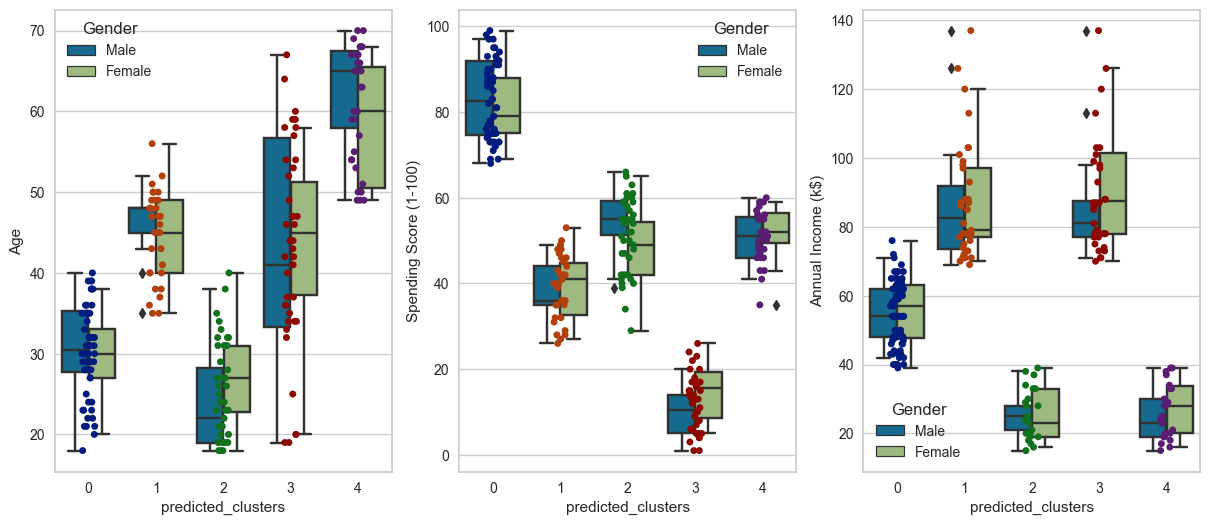

In [77]:
# I think I can separate clusters better with petal_length
# and petal_width features (according to lineplot)
# let's observe this with boxplot:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "predicted_clusters", data = X1, hue=df["Gender"])
sns.stripplot(y = "Age", x = "predicted_clusters", data = X1, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "Spending Score (1-100)", x = "predicted_clusters", data = X1, hue=df["Gender"])
sns.stripplot(y = "Spending Score (1-100)", x = "predicted_clusters", data = X1, palette="dark")

plt.subplot(143)
sns.boxplot(y = "Annual Income (k$)", x = "predicted_clusters", data = X2, hue=df["Gender"])
sns.stripplot(y = "Annual Income (k$)", x = "predicted_clusters", data = X2, palette="dark")



 You can drive more insights from here by Gender like in cluster **3**, we can notice that the Females  varies less in Age and has on average higher income than males which leads to a bit higher scoring, which means that we may try to market female goods

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___